# Inferential Statistics Ia - Frequentism

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

In [2]:
#print(norm.__doc__)

__A:__ The second lsited method is the probability density function, **pdf(x, loc=0, scale=1)**.

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__

In [3]:
seed(47)
# draw five samples here
sample = norm.rvs(size=5)
print(sample)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

__A:__ Since the sample was drawn from the normal distribution I expected th mean to be zero. However, this is not the case as can be seen by the sample mean printed below.

In [4]:
# Calculate and print the mean here, hint: use np.mean()
sample_mean = np.mean(sample)
print('Sample mean: {}'.format(sample_mean))

Sample mean: 0.19355593334131074


__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

In [5]:
# Calculating and printing standard deviation.
sample_std = np.sqrt(np.mean((sample-sample_mean)**2))
print('Calculated sample std. deviation: {}'.format(sample_std))

Calculated sample std. deviation: 0.9606195639478641


__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [6]:
# Calculate estimate of population standard deviation.
p_std1 = np.sqrt(np.sum((sample-sample_mean)**2)/(len(sample)-1))
print('Estimated population standard deviation: {}'.format(p_std1))

Estimated population standard deviation: 1.0740053227518152


__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__ It returns the calculated standard deviation of the samples, not the estimate of population standard deviation.

In [7]:
# Print the actual standard deviation of the random sample
print('Sample standard deviation: {}'.format(np.std(sample)))

Sample standard deviation: 0.9606195639478641


__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__

In [8]:
#print(np.std.__doc__)

In [9]:
# Calculate std. dev. using ddof=1
p_std2 = np.std(sample,ddof=1)

print('Estimate of population standard deviation using correction: {}'.format(p_std2))

Estimate of population standard deviation using correction: 1.0740053227518152


## II Sampling distributions

Let us imagine we live in a town of 50000 people and we know the height of everyone in this town. We will have 50000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [10]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

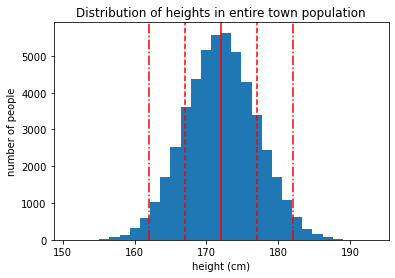

In [11]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [12]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [13]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

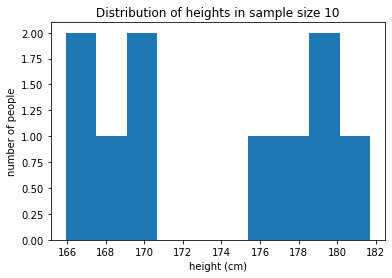

In [14]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean?

In [15]:
# Print the daily sample mean 
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [16]:
daily_sample2 = townsfolk_sampler(10)

In [17]:
np.mean(daily_sample2)

173.7317666636263

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__

In [18]:
seed(47)
# take your samples here

# Iterate over every day of the year,
# and append the mean of 10 samples
# taken every day.
sample_dist = [np.mean(townsfolk_sampler(10)) for i in range(365)]

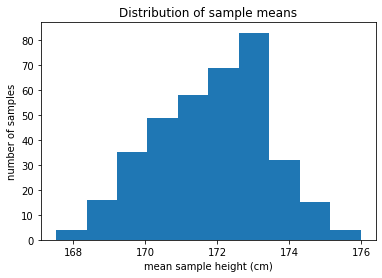

In [19]:
plt.hist(sample_dist);
plt.xlabel('mean sample height (cm)');
plt.ylabel('number of samples');
plt.title('Distribution of sample means');

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q:__ Verify the above results from the CLT.

__A:__

In [20]:
print('True population mean: ',np.mean(pop_heights))
print('Sample distribution mean: ',np.mean(sample_dist))

True population mean:  172.0192602425845
Sample distribution mean:  171.8660049358649


In [21]:
print('Expected standard deviation of sample distribution: ',np.std(pop_heights)/np.sqrt(10))
print('Calculated standard deviation of sample distribution: ',np.std(sample_dist))

Expected standard deviation of sample distribution:  1.5782419116544761
Calculated standard deviation of sample distribution:  1.5756704135286475


__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__ I would expect the distribution of sample means to get narrower as sample size is increased since the samples will become more likely to have a similar distribution to that of the population.

In [22]:
seed(47)
# calculate daily means from the larger sample size here
sample_dist = [np.mean(townsfolk_sampler(50)) for i in range(365)]

In [23]:
print('True population mean: ',np.mean(pop_heights))
print('Sample distribution mean: ',np.mean(sample_dist))
print('Expected standard deviation of sample distribution: ',np.std(pop_heights)/np.sqrt(50))
print('Calculated standard deviation of sample distribution: ',np.std(sample_dist))

True population mean:  172.0192602425845
Sample distribution mean:  171.94366080916114
Expected standard deviation of sample distribution:  0.7058112398797253
Calculated standard deviation of sample distribution:  0.6736107539771146


### III Normally testing times!

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__ First, note that for the standard normal distribution, the standard deviation is 1. Then 68% of observations are within the interval of -1 to +1, and 32% of observations are either less than -1 or greater than +1. By symmetry this implies that 16% of observations are greater than +1, and therefore **the probability of observing a value of 1 or less is  about 0.84**. 

Calculating this probability involved calculating the area under the pdf from the value of 1 and below. To put it another way, we need to integrate the pdf. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above. One way to do this is using look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [24]:
print('Probability of observing value of 1 or less: ',norm.cdf(1))

Probability of observing value of 1 or less:  0.8413447460685429


__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__

**Calculating explicitly**

Calculating the area under the pdf for the value of 177cm and below is equivalent to dividing the number of values less than or equal to 177cm by the total number of samples. Also, since the mean is 172cm with standard deviation of 5cm, we know that 177cm is 1 standard deviation away from the mean. Then **using the reasoning from the previous questions we know the answer is about 0.84**.

In [25]:
print('Probability of selecting person 177cm tall or less:',np.sum(pop_heights <= 177)/len(pop_heights))

Probability of selecting person 177cm tall or less: 0.84002


**Calculating using the cdf() function**

Assuming we know the population parameters, we can use the cdf() function to calculate this probability.

In [26]:
print('Probability of selecting person 177cm tall or less:',norm.cdf(177,172,5))

Probability of selecting person 177cm tall or less: 0.8413447460685429


__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__

In [27]:
extr = 1 - norm.cdf(200,172,5)
print('Probability of obtaining value at least 200cm: ',extr)

Probability of obtaining value at least 200cm:  1.0717590259723409e-08


__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

__A:__ The 95% Confidence Interval of the mean calculated using the critical z value does include the true population mean.

In [28]:
seed(47)
# take your sample now
sample = townsfolk_sampler(50)

In [29]:
# Calculate sample mean 
sample_mean = np.mean(sample)

In [30]:
# Estimate the population standard deviation
est_pop_std = np.std(sample,ddof=1)/np.sqrt(50)

In [31]:
z = round(norm.ppf(0.975),2)
me = z * est_pop_std

In [32]:
print('95% CI of the mean: ({},{})'.format(sample_mean-me,sample_mean+me))

95% CI of the mean: (171.6185985546047,173.9444231607529)


__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ By calculating the confidence interval using the critical z value, we are assuming that our estimated population standard deviation is exactly equal to the true population standard deviation. This directly contradicts our intitial assertion that we don't know the true population parameters.

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__ This interval is slightly wider than the previous confidence interval.

In [33]:
t_crit = t.ppf(0.975,df=49)

In [34]:
me = t_crit * est_pop_std

In [35]:
print('95% CI of the mean: ({},{})'.format(sample_mean-me,sample_mean+me))

95% CI of the mean: (171.589184447403,173.9738372679546)


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.